##**Part 1: Select and Prepare the Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
#importing the dataset from github:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'
df = pd.read_csv(url)


## **Part 2: Exploratory Analysis**

In [3]:
# understand the basic information about this dataset:
# print the first 5 columns of the dataset and obtain a description about the dataset:
pd.set_option('display.max_columns', None)
print(df.head())
print(df.shape)
print(df.info())
# note the dataset contains 21 columns and 173 rows. There is one empty cell under the columns "Men", "Women", and "ShareWomen" respectively

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

   Full_time  Part_time  Full_time_year_round  Unemployed  Unemployment_rate  \
0       1849        270       

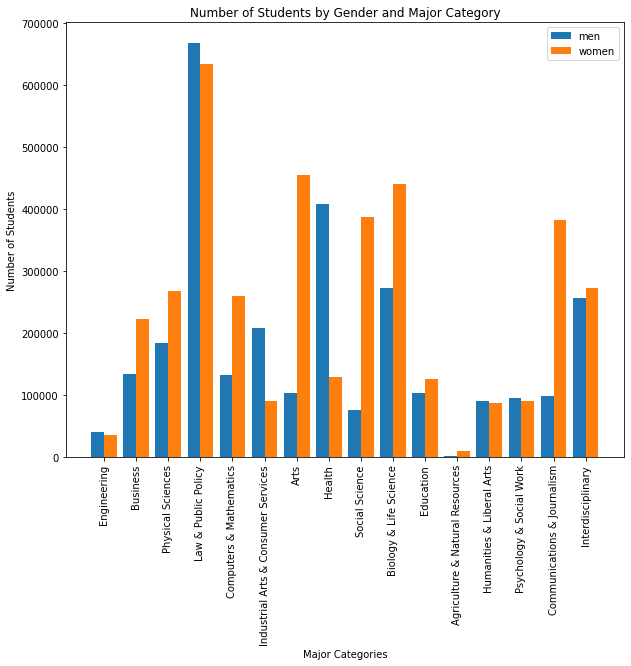

In [7]:
# hypothesis1: there are more males with physical science, life science and engineering majors, and more females with humanities, arts and social science majors
# identify and exclude the row with null values in columns 'Men' and 'Women':
copy1 = df.copy()
copy1.dropna(subset=['Men', 'Women'], inplace=True)
# calculate the sum of students of the same major category, based on their genders: 
men = copy1.groupby('Major_category')['Men'].sum()
women = copy1.groupby('Major_category')['Women'].sum()
# make a grouped bar chart to compare the number of men and women for each major category: 
x = copy1['Major_category'].unique()
plt.figure(figsize=(10, 8))
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1, men, w, label='men')
plt.bar(bar2, women,w, label='women')
plt.xlabel('Major Categories')
plt.ylabel('Number of Students')
plt.xticks(bar1+w/2, x, rotation=90)
plt.legend()
plt.title('Number of Students by Gender and Major Category')
plt.show()


Major_category
Biology & Life Science                 0.529626
Arts                                   0.581785
Humanities & Liberal Arts              0.584384
Psychology & Social Work               0.600823
Physical Sciences                      0.608435
Health                                 0.636442
Interdisciplinary                      0.653221
Social Science                         0.655025
Industrial Arts & Consumer Services    0.658783
Computers & Mathematics                0.694112
Communications & Journalism            0.696203
Law & Public Policy                    0.708738
Engineering                            0.710341
Education                              0.711927
Business                               0.759281
Agriculture & Natural Resources        0.768884
dtype: float64


Text(0.5, 1.0, 'Fulltime Employment Rate by Major Category in Descending Order')

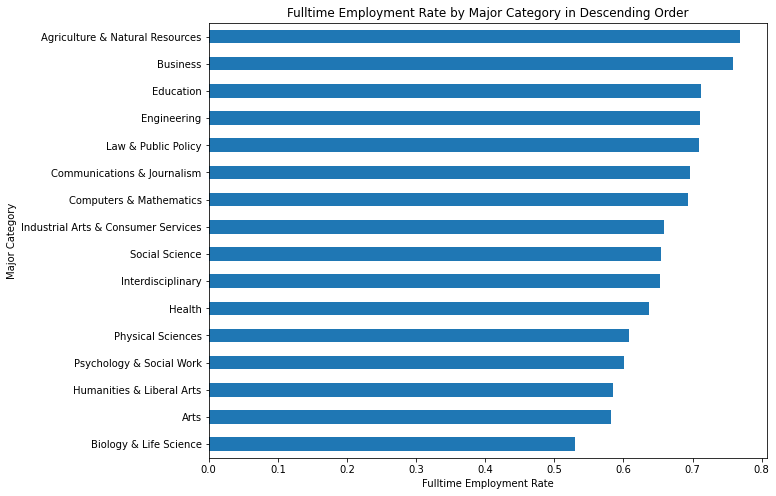

In [5]:
# hypothesis2: it is easier to find a fulltime job for graduates of a business or science major than for those of an arts or humanities major
copy2=df.copy()
# measure the percentage of graduates with a full time job by major category:
major_category = copy2['Major_category'].unique()
graduates = copy2.groupby('Major_category')['Total'].sum()
fulltime = copy2.groupby('Major_category')['Full_time'].sum()
fulltime_rate = fulltime/graduates
# plot a sorted bar graph showing the full time rate from high to low by category:
fulltime_rate.sort_values(ascending=True, inplace=True)
print(fulltime_rate)
ax = fulltime_rate.plot.barh(figsize=(10,8))
plt.xlabel('Fulltime Employment Rate')
plt.ylabel('Major Category')
plt.title('Fulltime Employment Rate by Major Category in Descending Order')

33000.0
45000.0
15000.0
63000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 6 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  167 non-null    int64  
 1   Major_code            167 non-null    int64  
 2   Major                 167 non-null    object 
 3   Total                 166 non-null    float64
 4   Men                   166 non-null    float64
 5   Women                 166 non-null    float64
 6   Major_category        167 non-null    object 
 7   ShareWomen            166 non-null    float64
 8   Sample_size           167 non-null    int64  
 9   Employed              167 non-null    int64  
 10  Full_time             167 non-null    int64  
 11  Part_time             167 non-null    int64  
 12  Full_time_year_round  167 non-null    int64  
 13  Unemployed            167 non-null    int64  
 14  Unemployment_rate     167 non-null    floa

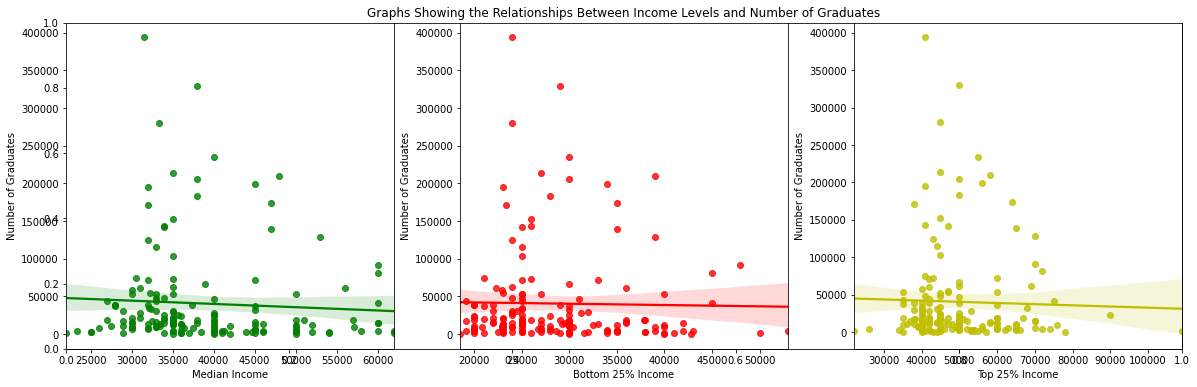

In [6]:
# hypothesis3: there is a correlation between the income level and the number of people choosing that major
copy3 = df.copy()
# first check if there are outliers(defined as less than Q1-1.5IQR or more than Q3+1.5IQR):
Q1 = copy3.Median.quantile(0.25)
Q3 = copy3.Median.quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
print(lower_limit)
print(upper_limit)
# drop the outliers before analyzing the relationships:
drop_indexes = copy3[(copy3['Median'] > upper_limit)|(copy3['Median'] < lower_limit)].index
copy3.drop(drop_indexes, inplace=True)
print(copy3.info())
# plot graphs to show the relationship between the number of graduates of a major and the respective incomes:
# a graph showing the relationship between number of graduates and the median income:
fig = plt.figure(figsize=(20,6))
plt.title('Graphs Showing the Relationships Between Income Levels and Number of Graduates')
ax1 = fig.add_subplot(1,3,1)
sn.regplot(x=copy3['Median'],y=copy3['Total'] , color='g')
plt.xlabel('Median Income')
plt.ylabel('Number of Graduates')
# a graph showing the relationship between number of graduates and the bottom 25% income:
ax2 = fig.add_subplot(1,3,2)
sn.regplot(x=copy3['P25th'],y=copy3['Total'] , color='r')
plt.xlabel('Bottom 25% Income')
plt.ylabel('Number of Graduates')
# a graph showing the relationship between number of graduates and the top 25% income:
ax3 = fig.add_subplot(1,3,3)
sn.regplot(x=copy3['P75th'],y=copy3['Total'] , color='y')
plt.xlabel('Top 25% Income')
plt.ylabel('Number of Graduates')

plt.show()

## **Final Deliverable**

Your final submission should consist of captioned visualizations detailing your most important insights. You will also work on writing and posting a blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Sunday (03/07/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.